<a href="https://colab.research.google.com/github/iam-fern/real_data/blob/main/cluster_China_Health_and_Nutrition_Survey_(CHNS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# where your file is located
FILE_LOCATION = '/content/drive/My Drive/pattern_realdata/pexam_pub_12.sas7bdat'

In [4]:
df = pd.read_sas(FILE_LOCATION)
df
#df.head()

/usr/local/lib/python3.7/dist-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")


,IDind,U25,U26,U27,U28,U29,U34,U35,U36,U424,...,U16,U17,U18,U19,U1D,CM1,U7_91,U8_91,U9_91,temp
0,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.111010e+11,1.0,28.0,0.0,NaN,360.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
2,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.111010e+11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
4,1.111010e+11,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126403,5.523040e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36.7
126404,5.523042e+11,1.0,18.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0
126405,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.1
126406,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0


###### **U21:** AGE (YEARS) AT 1ST MENSTRUATION  อายุ (ปี) เมื่อมีประจำเดือนครั้งแรก
###### **U22:** DIAGNOSED WITH HIGH BLOOD PRESSURE? ตรวจพบความดันโลหิตสูงหรือไม่?
###### **U23:** OF YEARS HAD HIGH BLOOD PRESSURE ปีมีความดันโลหิตสูง
###### **U24:** TAKING ANTI-HYPERTENSION DRUGS? ทานยาป้องกันความดันโลหิตสูงหรือไม่?
###### **U24A:** DIAGNOSED WITH DIABETES? วินิจฉัยว่าเป็นเบาหวานหรือไม่?
###### **U24B:** AGE (YEARS) AT DIABETES DIAGNOSIS อายุ (ปี) ที่การวินิจฉัยโรคเบาหวาน
###### **U24C:** DIABETES TREATMENT: SPECIAL DIET การรักษาโรคเบาหวาน: อาหารพิเศษ
###### **U24W2:** AGE AT MOST RECENT CANCER DIAGNOSIS? อายุที่วินิจฉัยมะเร็งล่าสุด?
###### **U26:** AGE (YEARS) STARTED SMOKING CIGARETTES อายุ (ปี) ที่เริ่มสูบบุหรี่
###### **U28:** OF CIGARETTES SMOKES PER DAY ปริมาณบุหรี่ต่อวัน
###### **U29:** OF MONTHS AGO STOPPED SMOKING เดือนก่อนที่หยุดสูบบุหรี่

In [5]:
table = df[['IDind', 'U24W2', 'U26']]
table

,IDind,U24W2,U26
0,1.111010e+11,NaN,NaN
1,1.111010e+11,NaN,28.0
2,1.111010e+11,64.0,NaN
3,1.111010e+11,65.0,NaN
4,1.111010e+11,NaN,NaN
...,...,...,...
126403,5.523040e+11,NaN,NaN
126404,5.523042e+11,NaN,18.0
126405,5.523042e+11,NaN,NaN
126406,5.523042e+11,NaN,NaN


In [6]:
# Define in which columns to look for missing values.
table1 = table.dropna(subset=['U24W2', 'U26'])
table1

,IDind,U24W2,U26
303,1.111040e+11,89.0,30.0
977,1.113030e+11,55.0,22.0
1052,1.113030e+11,52.0,30.0
5432,2.112031e+11,82.0,-99.0
11515,2.123050e+11,68.0,20.0
16825,2.321010e+11,50.0,20.0
20821,2.323041e+11,52.0,23.0
21631,2.324030e+11,48.0,16.0
22372,3.111010e+11,64.0,25.0
22578,3.111030e+11,60.0,18.0


In [7]:
x = table1[["U26"]]
y = table1["U24W2"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({"Actual": y, "Predicted": y_pred})

table_data_new = pd.DataFrame({ "x1"    : table1["U26"],
                                "y"     : df["Actual"],
                                "y_hat" : df["Predicted"]})
table_data_new["e"] = table_data_new["y"] - table_data_new["y_hat"]
table_data_new

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,x1,y,y_hat,e
303,30.0,89.0,56.508794,32.491206
977,22.0,55.0,56.664724,-1.664724
1052,30.0,52.0,56.508794,-4.508794
5432,-99.0,82.0,59.023161,22.976839
11515,20.0,68.0,56.703706,11.296294
16825,20.0,50.0,56.703706,-6.703706
20821,23.0,52.0,56.645233,-4.645233
21631,16.0,48.0,56.781671,-8.781671
22372,25.0,64.0,56.606250,7.393750
22578,18.0,60.0,56.742689,3.257311


In [8]:
table_data_new.to_csv('CHNS_U24W2_U26.csv')
files.download('CHNS_U24W2_U26.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

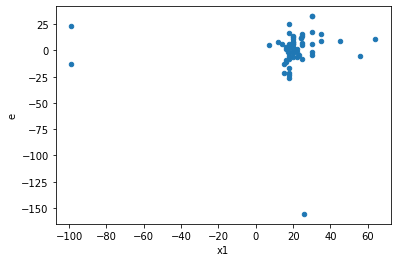

In [9]:
table_data_new.plot(x ='x1', y='e', kind = 'scatter')

In [14]:
# where your file is located
FILE_LOCATION1 = '/content/drive/My Drive/pattern_realdata/CHNS_U24W2_U26.csv'
df1 = pd.read_csv(FILE_LOCATION1)
df1

,no,x1,y,y_hat,e
0,1,30,89,56.508794,32.491206
1,2,22,55,56.664724,-1.664724
2,3,30,52,56.508794,-4.508794
3,4,-99,82,59.023161,22.976839
4,5,20,68,56.703706,11.296294
5,6,20,50,56.703706,-6.703706
6,7,23,52,56.645233,-4.645233
7,8,16,48,56.781671,-8.781671
8,9,25,64,56.606250,7.393750
9,10,18,60,56.742689,3.257311


In [16]:
# แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean
#Set number of clusters
x = df1[["x1"]]
k_means = KMeans(n_clusters=2)
#Run the clustering algorithm
model = k_means.fit(x)
#Generate cluster predictions and store in y_kmeans
#km.fit(x)
y_kmeans = k_means.predict(x)
y_kmeans

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [17]:
# kmean_clusters.astype(float)
kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})
kmean_clusters.head()

,clusters
0,0
1,0
2,0
3,1
4,0


In [18]:
# เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
data_clusters = pd.concat([df1, kmean_clusters], axis=1)
data_clusters

,no,x1,y,y_hat,e,clusters
0,1,30,89,56.508794,32.491206,0
1,2,22,55,56.664724,-1.664724,0
2,3,30,52,56.508794,-4.508794,0
3,4,-99,82,59.023161,22.976839,1
4,5,20,68,56.703706,11.296294,0
5,6,20,50,56.703706,-6.703706,0
6,7,23,52,56.645233,-4.645233,0
7,8,16,48,56.781671,-8.781671,0
8,9,25,64,56.606250,7.393750,0
9,10,18,60,56.742689,3.257311,0


In [19]:
# กลุ่มที่ 1
data_cluster0 = data_clusters[data_clusters.clusters == 0]

y = data_cluster0[['y']]
x = data_cluster0[['x1']]
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()

DF1 = model1.df_resid + 1
SSE1 = model1.ssr
MSE1 = SSE1/DF1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
DF1

56.0

In [21]:
SSE1

32655.465311424035

In [22]:
MSE1

583.1333091325721

In [24]:
# กลุ่มที่ 2
data_cluster1 = data_clusters[data_clusters.clusters == 1]

y = data_cluster1[['y']]
x = data_cluster1[['x1']]
x = sm.add_constant(x)
model2 = sm.OLS(y, x).fit()

DF2 = model2.df_resid + 1
SSE2 = model2.ssr
MSE2 = SSE2/DF2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
DF2

2.0

In [26]:
SSE2

648.0

In [27]:
MSE2

324.0

In [28]:
# คำนวณค่าสถิติ
GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)
GQ_test_clusters

0.5556190924541071

In [30]:
# คำนวณค่า p-value
# pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, DF2, DF1)))
p_greater = ss.f.cdf(GQ_test_clusters, DF2, DF1)
p_less = 1.0-ss.f.cdf(GQ_test_clusters, DF2, DF1)

In [33]:
p_greater

0.4231530087496152

In [34]:
p_less

0.5768469912503849

In [36]:
Significance = 0.05
if p_greater < Significance:
  print('Reject005=0 : Heteroscedasticity')
else:
  print('Reject005=1 : Homoscedasticity')

Reject005=1 : Homoscedasticity
